In [13]:
import xmlrpc.client
import pickle

server = xmlrpc.client.ServerProxy("http://localhost:8071")

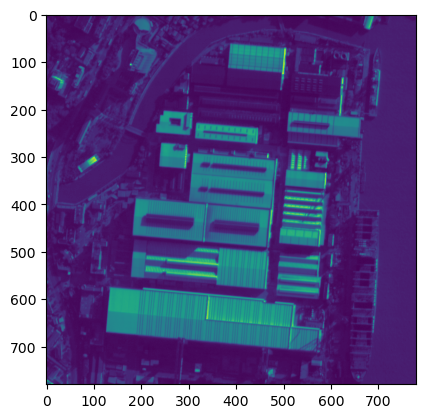

In [18]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr.squeeze())

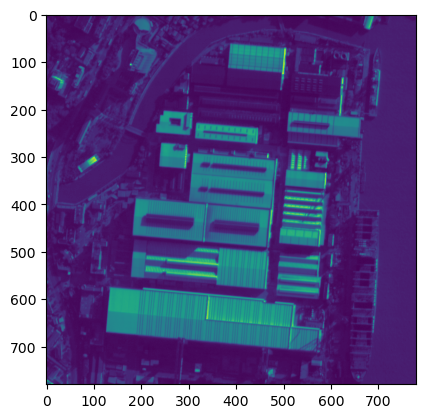

In [15]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

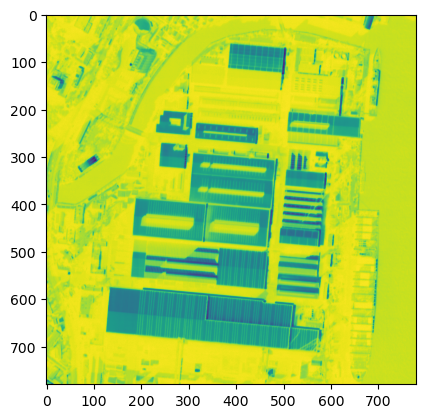

In [16]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

In [17]:
print(server.black_list_check(u'Петров'))
print(server.black_list_check(u'Примеров'))
print(server.black_list_check_by_fullname(u'Петров', u'Петр', u'Петрович', "07.08.1985"))

Петров: bad_boy
Примеров: good_boy
Петров Петрович Петр born 07.08.1985 is bad guy
